Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции:

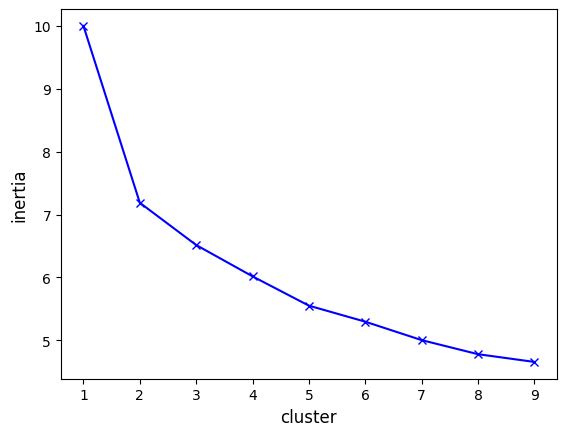

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Загрузка данных (например, датасет о диабете)
data = load_diabetes()
X = data.data  # Матрица признаков

# Стандартизация данных (важно для KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Функция для вычисления инерции
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    return k_means.inertia_

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')


Accuracy: 0.95
Precision: 0.50
Recall: 0.50
F1-score: 0.50


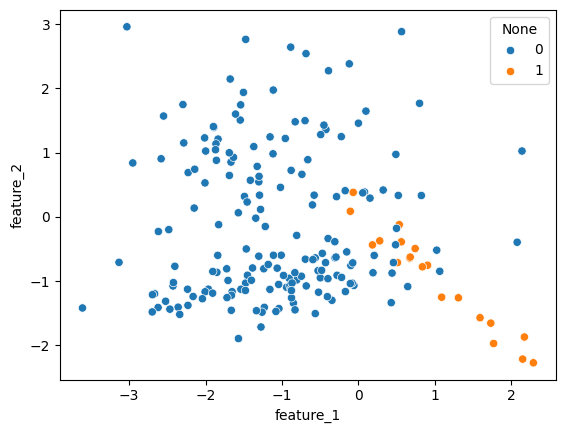

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets

# Генерация данных
X, y = datasets.make_classification(
    n_samples=200,  # количество объектов
    n_features=2,  # количество признаков
    n_informative=2,  # количество информативных признаков
    n_redundant=0,  # количество неинформативных признаков
    n_classes=2,  # количество классов
    weights=[1, 0.2],  # пропорции классов
    random_state=40  # генератор случайных чисел
)

# Преобразование данных в DataFrame и Series
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)

# Визуализация данных
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y)

# Разделение данных на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Предсказание для валидационной выборки
y_pred = model.predict(X_val)

# Расчет метрик классификации
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
